<a href="https://colab.research.google.com/github/jorgealiaga36/data-science-portfolio/blob/master/Vit_pretrained_imageNet1k_to_Fine_Tuning_Stanford.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creaton of Training, Test, Validation SET https://huggingface.co/blog/fine-tune-vit

In [ ]:
pip install folium==0.2.1

In [ ]:
pip install datasets transformers

In [ ]:
from datasets import load_dataset

dataset=load_dataset("dgrnd4/stanford_dog_dataset")
print("\n")
dataset

/usr/local/lib/python3.7/dist-packages/huggingface_hub/utils/_deprecation.py:97: FutureWarning: Deprecated argument(s) used in 'dataset_info': token. Will not be supported from version '0.12'.
  warnings.warn(message, FutureWarning)


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to /root/.cache/huggingface/datasets/dgrnd4___imagefolder/dgrnd4--animals-10-22c2f5b9344a4e24/0.0.0/e872d3ec27c6c200a8881a4af52930df7eca3372b19aa4d0f5db74a2fded8141. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 26179
    })
})

In [ ]:
print(len(dataset['train']))

In [ ]:
label = dataset['train'].features['label']


from transformers import ViTFeatureExtractor

model_name_or_path = 'google/vit-base-patch16-224-in21k'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name_or_path)

feature_extractor

Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

ViTFeatureExtractor {
  "do_normalize": true,
  "do_resize": true,
  "feature_extractor_type": "ViTFeatureExtractor",
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "size": 224
}

In [ ]:
label

In [ ]:
import cv2
import torch
from PIL import Image
import numpy as np
import io
import datasets
from datasets.dataset_dict import DatasetDict
from datasets import Dataset


# IL problema è che devo fare il reshape ed il resize di tutte le immagini del dataset
# le dimensioni devono essere (1,3,224,224) --> ce ne sono alcune che sono diverse
size_to_resize=(224,224)

# Devo lavorare con il tensore, non posso lavorare con l'immagine PIL -->
# Deve essere fatto quindi il features_extractor per portare il PIL al tensore

img_list=[]
labels_list=[]
for i in range(0,len(dataset['train'])): #len(dataset['train'])

  ex = dataset['train'][i] #i
  image = ex['image']
  image = image.convert("RGB") # <class 'PIL.Image.Image'> <PIL.Image.Image image mode=RGB size=500x333 at 0x7F84F1948150>
  image_resized = image.resize(size_to_resize) # <PIL.Image.Image image mode=RGB size=224x224 at 0x7F84F17885D0>

  img_list.append(image_resized)
  labels_list.append(dataset['train'][i]['label'])


In [ ]:
print(type(img_list))
print(type(img_list[0]))

print(type(labels_list))
print(type(labels_list[0]))

<class 'list'>
<class 'PIL.Image.Image'>
<class 'list'>
<class 'int'>


In [ ]:
'''
a = img_list[0]
type(np.divide(np.asarray(a),255))
'''
y_tr_ = []

for i in labels_list:
  y_tr_.append(np.asarray(i))
  #y_tr.append(i)


In [ ]:
#del x_te,x_tr,x_val,y_te,y_tr,y_val

In [ ]:
import random

# img_list    --> tutte le immagini del dataset
# labels_list --> tutte le labels del dataset

# Prendere x_tr, ed inserire in x_te e x_validation un totale di elementi pari a 2058
# ma che sia con tutte le classi possibili 2058/120=17.15; 17*120=2040

x_tr = []
y_tr = []
y_te = []
x_te = []
x_val = []
y_val = []


# Creiamo un array con tutti gli indici (inizio e fine) delle classi presenti nell'y_tr. Ogni elemento in arr_range_val_classes_in_tr rappresenta il cambio di classe in x_tr
arr_range_val_classes_in_tr=[0]
# Rappresenta il primo elemento in modo che poi possiamo andare a capire quando c'è il cambiamento di classe
tmp=y_tr_[0]

# prendere gli indici di inizio delle classi in x_tr cosi poi possiamo andare a prendere elementi random apparteneneti ad ogni classe
for i in range(0,len(y_tr_)):
  if tmp!=y_tr_[i]:
    tmp=y_tr_[i]
    arr_range_val_classes_in_tr.append(i)

arr_range_val_classes_in_tr.append(20579)



# Creiamo x_tr

# prendere 18 elementi per ogni classe (utilizzando arr_range_val_classes_in_tr), in maniera causale, ed inserirli in te SET e val SET
iter=0

while iter<120 :
  counter=1 # contatore per aggiungere 138 elementi per classe

  while counter<138 :
    rand_num_tr = random.randint(arr_range_val_classes_in_tr[iter], arr_range_val_classes_in_tr[iter+1]-1) #mettiamo il -1 cosi otteniamo tutti gli elementi dell'insieme

    #x_tr.append(np.asarray(dataset['train'][rand_num_te]['image']))
    x_tr.append(img_list[rand_num_tr])
    y_tr.append(np.asarray(y_tr_[rand_num_tr]))


    counter=counter+1

  iter=iter+1



# Creiamo ora x/y_te e x/y_val

# prendere 18 elementi per ogni classe (utilizzando arr_range_val_classes_in_tr), in maniera causale, ed inserirli in te SET e val SET
iter=0

while iter<120 :
  counter=1 # contatore per aggiungere 18 elementi per classe

  while counter<19 :
    rand_num_te = random.randint(arr_range_val_classes_in_tr[iter], arr_range_val_classes_in_tr[iter+1]-1) #mettiamo il -1 cosi otteniamo tutti gli elementi dell'insieme
    rand_num_val = random.randint(arr_range_val_classes_in_tr[iter], arr_range_val_classes_in_tr[iter+1]-1) #mettiamo il -1 cosi otteniamo tutti gli elementi dell'insieme

    #x_te.append(np.asarray(dataset['train'][rand_num_te]['image']))
    x_te.append(img_list[rand_num_te])
    y_te.append(np.asarray(y_tr_[rand_num_te]))

    #x_val.append(np.asarray(dataset['train'][rand_num_val]['image']))
    x_val.append(img_list[rand_num_val])
    y_val.append(np.asarray(y_tr_[rand_num_val]))

    counter=counter+1

  iter=iter+1



# Continuo Creazione Dataset (non importante se devo fare il load)

In [ ]:
#del img_list, labels_list

In [ ]:
# LIST to NP ARRAY --> Se non funziona qualcosa nel Dataset molto probabilmente è questo
'''
x_tr = np.asarray(x_tr)
x_te = np.asarray(x_te)
x_val = np.asarray(x_val)
'''

'\nx_tr = np.asarray(x_tr)\nx_te = np.asarray(x_te)\nx_val = np.asarray(x_val)\n'

In [ ]:
# NORMALIZZATION --> la sto effettiando direttamente quando creo i tre np.array
# se provo a fare questa cosa CRASHA
'''x_tr= np.divide(x_tr,255)
x_te= np.divide(x_te,255)
x_val= np.divide(x_val,255)'''

'x_tr= np.divide(x_tr,255)\nx_te= np.divide(x_te,255)\nx_val= np.divide(x_val,255)'

In [ ]:
'''print(type(x_tr))
print(type(x_te))
print(type(x_val))
print()
print(x_tr.shape)
print(x_te.shape)
print(x_val.shape)'''

'print(type(x_tr))\nprint(type(x_te))\nprint(type(x_val))\nprint()\nprint(x_tr.shape)\nprint(x_te.shape)\nprint(x_val.shape)'

In [ ]:
import datasets
from datasets.dataset_dict import DatasetDict
from datasets import Dataset

percentage_divison_test = int(len(dataset['train'])/100 *10)       # 10%  --> 2058
percentage_divison_validation = int(len(dataset['train'])/100 *20) # 20%  --> 4116


'''dataset_ = datasets.DatasetDict({"train": Dataset.from_dict({

                                  'image': img_list,     #0,20580 --> risolviamo tutti i problemi e prendiamo tutti gli elementi e tutte le classi
                                  'label': dataset['train']['label']    #'labels_list oppure dataset['train']['label']
                                  }),

                                 "test": Dataset.from_dict({  #20580-4116 (validation) ,20580-2058 (test)
                                  'image':  img_list[len(dataset['train']) - percentage_divison_validation : len(dataset['train']) - percentage_divison_test],
                                  'label': labels_list[len(dataset['train']) - percentage_divison_validation : len(dataset['train']) - percentage_divison_test] }),

                                  "validation": Dataset.from_dict({ # 20580-2058 (test)
                                  'image':  img_list[len(dataset['train']) - percentage_divison_test : len(dataset['train'])],
                                  'label': labels_list[len(dataset['train']) - percentage_divison_test : len(dataset['train'])]}),
                                })
'''

dataset_ = datasets.DatasetDict({"train": Dataset.from_dict({

                                  'image': x_tr,
                                  'label': y_tr
                                  }),

                                 "test": Dataset.from_dict({
                                  'image':  x_te,
                                  'label':  y_te }),

                                  "validation": Dataset.from_dict({
                                  'image': x_val,
                                  'label': y_val }),
                                })

del dataset
dataset=dataset_
del dataset_

In [ ]:
'''
print(len(dataset['train']))
print(len(dataset['test']))
print(len(dataset['validation']))
print(type(dataset))
print(type(dataset['train']))
print(type(dataset['train']['label']))
'''

"\nprint(len(dataset['train']))\nprint(len(dataset['test']))\nprint(len(dataset['validation']))\nprint(type(dataset))\nprint(type(dataset['train']))\nprint(type(dataset['train']['label']))\n"

In [ ]:
# function to get unique values
def unique(list1):

    # initialize a null list
    unique_list = []

    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)

    # print list
    #for x in unique_list:
        #print(x)

    return unique_list

unique_arr_tr = unique(dataset['train']['label'])
unique_arr_te = unique(dataset['test']['label'])
unique_arr_val = unique(dataset['validation']['label'])

print(len(sorted(unique_arr_te)))
print(len(sorted(unique_arr_val)))
print(len(sorted(unique_arr_tr)))  #120
del unique_arr_te, unique_arr_tr, unique_arr_val

120
120
120


[118]
[118]
[118]


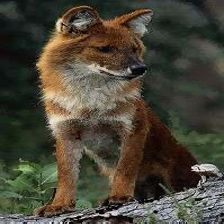

In [ ]:
print(dataset['train'][10]['label'])
dataset['train'][10]['image']

print(dataset['test'][10]['label'])
dataset['test'][10]['image']

print(dataset['validation'][10]['label'])
dataset['validation'][10]['image']

In [ ]:
label.int2str(ex['label']) # ex['label] è un numero --> dato un numero torna la stringa della classe relativa

'n02116738-African_hunting_dog'

In [ ]:
def process_example(example):
    inputs = feature_extractor(example['image'], return_tensors='pt')
    inputs['label'] = example['label']
    return inputs

process_example(ex)

{'pixel_values': tensor([[[[-0.6078, -0.6706, -0.6706,  ..., -0.0588, -0.0902, -0.0196],
          [-0.5529, -0.6078, -0.6235,  ..., -0.0824, -0.1137, -0.0510],
          [-0.5059, -0.5059, -0.5294,  ..., -0.1608, -0.1451, -0.0745],
          ...,
          [ 0.2157,  0.2549,  0.1843,  ..., -0.8039, -0.6784, -0.6627],
          [ 0.2784,  0.2941,  0.1922,  ..., -0.8902, -0.8667, -0.8745],
          [ 0.3020,  0.3098,  0.2627,  ..., -0.8824, -0.8745, -0.8667]],

         [[-0.5451, -0.6157, -0.6000,  ..., -0.2235, -0.2471, -0.1686],
          [-0.4824, -0.5451, -0.5451,  ..., -0.2392, -0.2627, -0.1922],
          [-0.4275, -0.4275, -0.4431,  ..., -0.2863, -0.2706, -0.2000],
          ...,
          [-0.0275,  0.0039, -0.0667,  ..., -0.8039, -0.7020, -0.6941],
          [ 0.0353,  0.0510, -0.0510,  ..., -0.8902, -0.8824, -0.8902],
          [ 0.0588,  0.0667,  0.0196,  ..., -0.8745, -0.8745, -0.8745]],

         [[-0.6235, -0.7098, -0.7647,  ..., -0.3569, -0.3647, -0.2784],
          [-0

In [ ]:

def transform(example_batch):
    # Take a list of PIL images and turn them to pixel values
    inputs = feature_extractor([x for x in example_batch['image']], return_tensors='pt')

    # Don't forget to include the label!
    inputs['label'] = example_batch['label']
    return inputs

prepared_ds = dataset.with_transform(transform)
prepared_ds['train'][0:2]

Parameter 'transform'=<function transform at 0x7fada222a560> of the transform datasets.arrow_dataset.Dataset.set_format couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


{'pixel_values': tensor([[[[-0.4588, -0.6000, -0.6078,  ..., -0.1843, -0.1059,  0.0039],
          [-0.4353, -0.6471, -0.6941,  ..., -0.1373, -0.0745,  0.0275],
          [-0.3961, -0.6471, -0.7412,  ..., -0.1765, -0.1216, -0.0196],
          ...,
          [-0.1843, -0.0039,  0.1373,  ..., -0.3412, -0.2392, -0.4118],
          [ 0.4275,  0.3647,  0.2314,  ..., -0.2941, -0.1765, -0.3647],
          [ 0.2157,  0.6078,  0.4510,  ..., -0.2471, -0.1843, -0.4039]],

         [[-0.4039, -0.5294, -0.5137,  ...,  0.0275,  0.0824,  0.1765],
          [-0.4118, -0.6157, -0.6314,  ...,  0.0667,  0.1059,  0.2000],
          [-0.4118, -0.6627, -0.7333,  ...,  0.0353,  0.0588,  0.1451],
          ...,
          [-0.0118,  0.1373,  0.2627,  ..., -0.2941, -0.2784, -0.5216],
          [ 0.6392,  0.5216,  0.3961,  ..., -0.2000, -0.2157, -0.5059],
          [ 0.4275,  0.7647,  0.6157,  ..., -0.1529, -0.2235, -0.5373]],

         [[-0.7725, -0.9059, -0.9686,  ..., -0.8118, -0.8667, -0.7882],
          [-0

In [ ]:
import torch

def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['label'] for x in batch])
    }


In [ ]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")
def compute_metrics(p):
    return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)

In [ ]:
label

ClassLabel(num_classes=120, names=['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwic

# Training

In [ ]:
from transformers import ViTForImageClassification

labels = label.names

'''
model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_label=len(label),
    id2label={str(i): c for i, c in enumerate(label)},
    label2id={c: str(i) for i, c in enumerate(label)}
)
'''

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)}
)

Downloading:   0%|          | 0.00/502 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/330M [00:00<?, ?B/s]

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.weight', 'pooler.dense.bias']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="./vit-stanford-dog-dataset",
  per_device_train_batch_size=16,
  evaluation_strategy="steps",
  num_train_epochs=4,
  fp16=True,
  save_steps=100,
  eval_steps=100,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=False,
  report_to='tensorboard',
  load_best_model_at_end=True,
)

In [ ]:
prepared_ds

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_ds["train"],
    eval_dataset=prepared_ds["validation"],
    tokenizer=feature_extractor,
)

Using cuda_amp half precision backend


# Training Finale

In [ ]:
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

# Save model

In [ ]:
# Save from the default format model to pytorch model, to TF version and save in a new folder that the .h5 file
'''
from transformers import AutoModelForImageClassification
from transformers import TFAutoModelForImageClassification


model.save_pretrained('_pytorch')
tf_model = TFAutoModelForImageClassification.from_pretrained('_pytorch', from_pt=True)
tf_model.save_pretrained('_tf') # in questa cartella c'e il file .h5

'''

# Load model

In [ ]:
pip install folium==0.2.1

In [ ]:
pip install datasets transformers

In [ ]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
from transformers import AutoModelForImageClassification
from transformers import TFAutoModelForImageClassification
from PIL import Image

# from_pt=True

model_directory = "drive/MyDrive/Tirocinio/1ris_vit-stanford-dog-dataset" # 1ris_vit-stanford-dog-dataset(99.26%) 2ris_vit-stanford-dog-dataset(91.38%)
tokenizer = ViTFeatureExtractor.from_pretrained(model_directory)
model = ViTForImageClassification.from_pretrained(model_directory)


pytorch_path = "drive/MyDrive/Tirocinio/ViT_model_pytorch"
model_pytorch = ViTForImageClassification.from_pretrained(pytorch_path)

h5_path = "drive/MyDrive/Tirocinio/ViT_model_tf"
model_h5 = ViTForImageClassification.from_pretrained(h5_path, from_tf=True)

All TF 2.0 model weights were used when initializing ViTForImageClassification.

All the weights of ViTForImageClassification were initialized from the TF 2.0 model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use ViTForImageClassification for predictions without further training.


In [ ]:
model

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0): ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_

# Pytorch to Onnx

In [ ]:
pip install onnx

In [ ]:
pip install onnxruntime

In [ ]:
# Some standard imports
import io
import numpy as np

from torch import nn
import torch.utils.model_zoo as model_zoo
import torch.onnx

In [ ]:
# set the model to inference mode
model_pytorch.eval()

In [ ]:
# Input to the model
x = torch.randn(1, 3, 224, 224, requires_grad=True) # il primo parametro è il batch_size (16) --> infatti in input l'immagine viene passata come 768 = 16*16*3
torch_out = model_pytorch(x)

model_onnx = "modello_onnx.onnx"

# Export the model
torch.onnx.export(model_pytorch,                                 # model being run
                  x,                                             # model input (or a tuple for multiple inputs)
                  model_onnx,                       # where to save the model (can be a file or file-like object)
                  export_params=True,                            # store the trained parameter weights inside the model file
                  opset_version=10,                              # the ONNX version to export the model to
                  do_constant_folding=True,                      # whether to execute constant folding for optimization
                  input_names = ['input'],                       # the model's input names
                  output_names = ['output'],                     # the model's output names
                  dynamic_axes={'input' : {  0 : 'batch_size' },    # variable length axes
                                'output' : { 0 : 'batch_size' }})

/usr/local/lib/python3.7/dist-packages/transformers/models/vit/modeling_vit.py:166: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if num_channels != self.num_channels:
/usr/local/lib/python3.7/dist-packages/transformers/models/vit/modeling_vit.py:171: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if height != self.image_size[0] or width != self.image_size[1]:


In [ ]:
import onnx

onnx_model = onnx.load(model_onnx)
onnx.checker.check_model(onnx_model)

In [ ]:
import onnxruntime

ort_session = onnxruntime.InferenceSession(model_onnx)

#def to_numpy(tensor):
#    return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

# compute ONNX Runtime output prediction
ort_inputs = {ort_session.get_inputs()[0].name: to_numpy(x)}
ort_outs = ort_session.run(None, ort_inputs)

# compare ONNX Runtime and PyTorch results
#np.testing.assert_allclose(to_numpy(torch_out), ort_outs[0], rtol=1e-03, atol=1e-05)

print("Exported model has been tested with ONNXRuntime, and the result looks good!")

Exported model has been tested with ONNXRuntime, and the result looks good!


# Tensorflow To ONNX

In [ ]:
pip install tf2onnx

In [ ]:
pip install git+https://github.com/onnx/tensorflow-onnx

In [ ]:
import tensorflow as tf
import tf2onnx
import onnx

# the model in Tensorflow is the model_h5

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, activation="relu"))

input_signature = [tf.TensorSpec([3, 3], tf.float32, name='x')]
# Use from_function for tf functions
onnx_model, _ = tf2onnx.convert.from_keras(model, input_signature, opset=13)
onnx.save(onnx_model, ".onnx")

Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`


In [ ]:
#python -m tf2onnx.convert --saved-model drive/MyDrive/Tirocinio/1ris_vit-stanford-dog-dataset/ --output model.onnx --opset 13

# Concrete Functions

In [ ]:
import tensorflow as tf

# Create a model using low-level tf.* APIs
class Squared(tf.Module):
  @tf.function(input_signature=[tf.TensorSpec(shape=[None], dtype=tf.float32)])
  def __call__(self, x):
    return tf.square(x)

model = Squared()
# (ro run your model) result = Squared(5.0) # This prints "25.0"
# (to generate a SavedModel) tf.saved_model.save(model, "saved_model_tf_dir")
concrete_func = model.__call__.get_concrete_function()

# Convert the model.

converter = tf.lite.TFLiteConverter.from_concrete_functions( [concrete_func], model )
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpv9pvewj8/assets


INFO:tensorflow:Assets written to: /tmp/tmpv9pvewj8/assets


In [ ]:
import numpy as np
import tensorflow as tf

# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test model on random input data.
input_shape = input_details[0]['shape']
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[0.03945423]


In [ ]:
# https://huggingface.co/transformers/v4.5.1/main_classes/model.html#transformers.PreTrainedModel.save_pretrained

In [ ]:
#model.save("model_keras.h5")

# Predict

In [ ]:
# è l'unico modo per effettuare predizione in quanto il model ha una configurazione tutta sua
count_error=0
arr_pred=[]

#for i in range(0,len(x_te)):
for i in range(0,2):
  if i%50==0: # ogni 50 elementi stampa l'iteratore
    print(i)
  inputs = tokenizer(images = x_te[i], return_tensors="pt")
  #outputs = model(**inputs)
  outputs = model_h5(**inputs)
  logits = outputs.logits

  # model predicts one of the 1000 ImageNet classes
  predicted_class_idx = logits.argmax(-1).item()
  arr_pred.append(predicted_class_idx)

  if str(predicted_class_idx) != str(y_te[i]):
    count_error = count_error+1
  #print("Predicted class:" + str(predicted_class_idx) + " -- " + str(model.config.id2label[predicted_class_idx]))
  #print("While real class is: " + str(y_te[i]) + " -- " + str(model.config.id2label[int(y_te[i])]))

print("\n")
print("Numero di errori:  ",count_error)
print("Numero totali Test:" ,len(x_te))

from sklearn.metrics import accuracy_score
print()
print("Accuracy score: ",accuracy_score(y_te[0:2], arr_pred))



0


Numero di errori:   0
Numero totali Test: 2160

Accuracy score:  1.0


In [ ]:
# PREDICT A SINGLE IMAGE

'''

from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import requests

url = 'OIP.jpg'
image = Image.open(url)

feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')


print("MODELLO BASIC")
inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])
print()
print()
print()


print("MODELLO PYTORCH")
inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model_pytorch(**inputs)
logits = outputs.logits
# model_pytorch predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model_pytorch.config.id2label[predicted_class_idx])
print()
print()
print()


print("MODELLO TF")
inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model_h5(**inputs)
logits = outputs.logits
# model_h5 predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model_h5.config.id2label[predicted_class_idx])
'''

MODELLO BASIC
Predicted class: n02085620-Chihuahua



MODELLO PYTORCH
Predicted class: n02085620-Chihuahua



MODELLO TF
Predicted class: n02085620-Chihuahua


In [ ]:
'''

1ris_vit-stanford-dog-dataset --> 0.9921 sul test set
2ris_vit-stanford-dog-dataset --> 0.9138 sul test set

'''

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

count_parameters(model) # 85.890.936
#count_parameters(model_h5)

85890936